<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

Presentado por: Adriana Marcela Munoz <br>
Fecha: 31/03/2024

## Importación de librerias necesarias

In [ ]:
#Para esta actividad se importarán las siguientes librerías:
!pip install Scikit-learn


In [ ]:
!pip3 install seaborn

## Cargar el Dataset

In [ ]:
#Código para cargar el Dataset
#url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'
import pandas as pd
import numpy as np
datos=pd.read_csv('https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv',sep=';')
datos



,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1745,low,low,5more,more,med,high,vgood
1746,low,low,5more,more,med,high,vgood
1747,low,low,5more,more,big,low,unacc
1748,low,low,5more,more,big,med,good


## Explique el problema a resolver.
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes:

Se cuenta con un dataset de 1750 datos con 7 variables se identifican las variables de entrada las siguientes
Precio (muy alto, alto, medio, bajo)
Costo de mantenimiento (muy alto, alto, medio, bajo)
No de puertas (2,3,4,5 o mas)
Capacidad de pasajeros (2,4,mas)
Tamaño del baul (pequeño, meiano, grande)
Categorizacion de la seguridad del vehiculo (aceptable, buena, muy buena, inaceptable)

## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [ ]:
# Numero de instancias en total
datos.shape

(1750, 7)

# Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.

Se cuenta con un dataset de 1750 datos con 7 variables se identifican las variables de entrada las siguientes
Precio (muy alto, alto, medio, bajo)
Costo de mantenimiento (muy alto, alto, medio, bajo)
No de puertas (2,3,4,5 o mas)
Capacidad de pasajeros (2,4,mas)
Tamaño del baul (pequeño, meiano, grande)
Categorizacion de la seguridad del vehiculo (aceptable, buena, muy buena, inaceptable)

In [ ]:
datos.columns

Index(['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety',
       'class'],
      dtype='object')

In [ ]:
pd.unique(datos['Buying'])

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
pd.unique(datos['Maintenance'])

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
pd.unique(datos['Doors'])

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
pd.unique(datos['Person'])

array(['2', '4', 'more'], dtype=object)

In [ ]:
pd.unique(datos['lug_boot'])

array(['small', 'med', 'big'], dtype=object)

In [ ]:
pd.unique(datos['safety'])

array(['low', 'med', 'high'], dtype=object)

In [ ]:
pd.unique(datos['class'])

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

#Número de instancias pertenecientes a cada clase.

In [ ]:
datos['Buying'].value_counts().sort_index()

high     432
low      437
med      438
vhigh    443
Name: Buying, dtype: int64

In [ ]:
datos['Maintenance'].value_counts().sort_index()

high     432
low      447
med      434
vhigh    437
Name: Maintenance, dtype: int64

In [ ]:
datos['Doors'].value_counts().sort_index()

Doors
2        444
3        435
4        434
5more    437
Name: count, dtype: int64

In [ ]:
datos['Person'].value_counts().sort_index()

2       578
4       587
more    585
Name: Person, dtype: int64

In [ ]:
datos['lug_boot'].value_counts().sort_index()

big      585
med      583
small    582
Name: lug_boot, dtype: int64

In [ ]:
datos['class'].value_counts().sort_index()

class
acc       390
good       75
unacc    1215
vgood      70
Name: count, dtype: int64

In [ ]:
datos['safety'].value_counts().sort_index()

safety
high    590
low     578
med     582
Name: count, dtype: int64

#Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)

In [ ]:
Buying = pd.crosstab(datos['Buying'],datos['class'])
Buying

class,acc,good,unacc,vgood
Buying,,,,
high,108,0,324,0
low,89,46,258,44
med,115,29,268,26
vhigh,78,0,365,0


In [ ]:
Maintenance = pd.crosstab(datos['Maintenance'], datos['class'])
Maintenance

class,acc,good,unacc,vgood
Maintenance,,,,
high,105,0,314,13
low,96,52,268,31
med,117,23,268,26
vhigh,72,0,365,0


In [ ]:
Doors = pd.crosstab(datos['Doors'], datos['class'])
Doors


class,acc,good,unacc,vgood
Doors,,,,
2,85,20,329,10
3,100,19,301,15
4,102,18,293,21
5more,103,18,292,24


In [ ]:

Person = pd.crosstab(datos['Person'], datos['class'])
Person


class,acc,good,unacc,vgood
Person,,,,
2,0,0,578,0
4,201,40,314,32
more,189,35,323,38


In [ ]:
lug_boot = pd.crosstab(datos['lug_boot'], datos['class'])
lug_boot

class,acc,good,unacc,vgood
lug_boot,,,,
big,146,26,370,43
med,138,26,392,27
small,106,23,453,0


In [ ]:
safety = pd.crosstab(datos['safety'], datos['class'])
safety

class,acc,good,unacc,vgood
safety,,,,
high,207,34,279,70
low,0,0,578,0
med,183,41,358,0


In [ ]:
datos['class'].value_counts().sort_index()

acc       390
good       75
unacc    1215
vgood      70
Name: class, dtype: int64

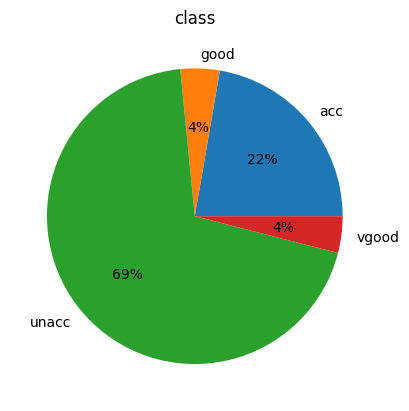

In [ ]:
import matplotlib.pyplot as plt


x = datos['class'].value_counts().sort_index()
labels = ['acc','good','unacc','vgood']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, autopct='%.0f%%')
ax.set_title('class')
plt.show()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    
Se observa que la mayoria de clasificación de los carros se encuentra en la categoria de inaceptable, cuando se realiza una relacion frente a la aceptabilidad con las variables de precio, mantenimiento y seguridad se observa que los automoviles tienen tienen una alta participacion en automoviles inseguros, con altos costos de adquisición y altos costos de mantenimiento.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
# import required modules
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv',sep=';')
df







,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1745,low,low,5more,more,med,high,vgood
1746,low,low,5more,more,med,high,vgood
1747,low,low,5more,more,big,low,unacc
1748,low,low,5more,more,big,med,good


In [ ]:
#Se limpian los datos dejando las columnas con las variables consideradas relevantes para el analisis
df1= df[["class","Buying","Maintenance","safety"]]
df1.shape

(1750, 4)

In [ ]:
df1.describe ()

,class,Buying,Maintenance,safety
count,1750,1750,1750,1750
unique,4,4,4,3
top,unacc,vhigh,low,high
freq,1215,443,447,590


In [ ]:
dummy_class=pd.get_dummies(df1["class"])
dummy_class.head()
dummy_class+0



,acc,good,unacc,vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1745,0,0,0,1
1746,0,0,0,1
1747,0,0,1,0
1748,0,1,0,0


In [ ]:
df1=df1.drop(["class"],axis=1)
df1.shape

(1750, 3)

In [ ]:
df2=pd.concat([df1,dummy_class+0], axis=1)
df2.shape

(1750, 7)

In [ ]:
df2.head()

,Buying,Maintenance,safety,acc,good,unacc,vgood
0,vhigh,vhigh,low,0,0,1,0
1,vhigh,vhigh,med,0,0,1,0
2,vhigh,vhigh,high,0,0,1,0
3,vhigh,vhigh,low,0,0,1,0
4,vhigh,vhigh,med,0,0,1,0


In [ ]:
dummy_Buying=pd.get_dummies(df2["Buying"],prefix="Buying")
dummy_Buying.head()
dummy_Buying+0

,Buying_high,Buying_low,Buying_med,Buying_vhigh
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1745,0,1,0,0
1746,0,1,0,0
1747,0,1,0,0
1748,0,1,0,0


In [ ]:
df2=df2.drop(["Buying"],axis=1)

In [ ]:
df3=pd.concat([df2,dummy_Buying+0], axis=1)
df3.shape


(1750, 10)

In [ ]:
df3.head()

,Maintenance,safety,acc,good,unacc,vgood,Buying_high,Buying_low,Buying_med,Buying_vhigh
0,vhigh,low,0,0,1,0,0,0,0,1
1,vhigh,med,0,0,1,0,0,0,0,1
2,vhigh,high,0,0,1,0,0,0,0,1
3,vhigh,low,0,0,1,0,0,0,0,1
4,vhigh,med,0,0,1,0,0,0,0,1


In [ ]:
dummy_Maintenance=pd.get_dummies(df3["Maintenance"],prefix="Maintenance")
dummy_Maintenance.head()
dummy_Maintenance+0


,Maintenance_high,Maintenance_low,Maintenance_med,Maintenance_vhigh
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1745,0,1,0,0
1746,0,1,0,0
1747,0,1,0,0
1748,0,1,0,0


In [ ]:
df3=df3.drop(["Maintenance"],axis=1)

In [ ]:
df4=pd.concat([df3,dummy_Maintenance+0], axis=1)

In [ ]:
df4.shape

(1750, 13)

In [ ]:
df4.head()

,safety,acc,good,unacc,vgood,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maintenance_high,Maintenance_low,Maintenance_med,Maintenance_vhigh
0,low,0,0,1,0,0,0,0,1,0,0,0,1
1,med,0,0,1,0,0,0,0,1,0,0,0,1
2,high,0,0,1,0,0,0,0,1,0,0,0,1
3,low,0,0,1,0,0,0,0,1,0,0,0,1
4,med,0,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
dummy_safety=pd.get_dummies(df4["safety"],prefix="safety")
dummy_safety.head()
dummy_safety+0

,safety_high,safety_low,safety_med
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
1745,1,0,0
1746,1,0,0
1747,0,1,0
1748,0,0,1


In [ ]:
df4=df4.drop(["safety"],axis=1)
df5=pd.concat([df4,dummy_safety+0], axis=1)
df5.head()


,acc,good,unacc,vgood,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maintenance_high,Maintenance_low,Maintenance_med,Maintenance_vhigh,safety_high,safety_low,safety_med
0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
df5.shape

(1750, 15)

## División del dataset en datos de entrenamiento y datos de test

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
#Para el ejercicio se utilizará una estrategia de 60% entrenamiento, 20% validación y 20% prueba
from sklearn.model_selection import train_test_split
datos2=df5.loc[:,["acc","good","unacc","vgood","Buying_high","Buying_low","Buying_med","Buying_vhigh","Maintenance_high","Maintenance_low","Maintenance_med",	"Maintenance_vhigh","safety_high","safety_low","safety_med"]]


In [ ]:
X=datos2.loc[:,["good","unacc","vgood","Buying_high","Buying_low","Buying_med",	"Buying_vhigh",	"Maintenance_high",	"Maintenance_low","Maintenance_med",	"Maintenance_vhigh","safety_high","safety_low","safety_med"]]
Y=datos2.loc[:,["acc"]]

In [ ]:
X_entr,X_prue,Y_entr,Y_prue = train_test_split(X,Y,test_size=0.3,random_state=0 , stratify=Y)

In [ ]:
X_entr

,good,unacc,vgood,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maintenance_high,Maintenance_low,Maintenance_med,Maintenance_vhigh,safety_high,safety_low,safety_med
1127,0,1,0,0,0,1,0,0,0,1,0,0,1,0
54,0,1,0,0,0,0,1,0,0,0,1,1,0,0
952,0,0,0,0,0,1,0,0,0,0,1,1,0,0
957,0,1,0,0,0,1,0,0,0,0,1,0,0,1
1722,0,1,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1205,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1397,0,1,0,0,1,0,0,0,0,0,1,0,1,0
460,0,1,0,1,0,0,0,0,0,0,1,1,0,0


In [ ]:
1225/1750

0.7

In [ ]:
X_prue


,good,unacc,vgood,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maintenance_high,Maintenance_low,Maintenance_med,Maintenance_vhigh,safety_high,safety_low,safety_med
883,0,1,0,0,0,1,0,0,0,0,1,1,0,0
804,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1488,0,0,0,0,1,0,0,1,0,0,0,0,0,1
924,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1377,0,1,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,1,0,0,0,1,0,0,0,1,0,1,0,0
945,0,0,0,0,0,1,0,0,0,0,1,0,0,1
316,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1031,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [ ]:
525/1750

0.3

In [ ]:
Y_entr

,acc
1127,0
54,0
952,1
957,0
1722,0
...,...
788,0
1205,0
1397,0
460,0


In [ ]:
Y_prue

,acc
883,0
804,0
1488,1
924,1
1377,0
...,...
1120,0
945,1
316,0
1031,0


In [ ]:
#Código de ajuste del modelo de clasificación 1 Bosque de decisión

In [ ]:
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
model=DecisionTreeClassifier()
model.fit (X_entr, Y_entr)
predictions = model.predict (X_prue)
print (model)

DecisionTreeClassifier()


In [ ]:
#Precision obtenida
print (accuracy_score (Y_prue, predictions) )

1.0


In [ ]:
#Matriz de confusion: muestra una precisión del 100%
print (confusion_matrix (Y_prue, predictions) )

[[408   0]
 [  0 117]]


In [ ]:
print (classification_report (Y_prue, predictions) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       117

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [ ]:
model

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
data= tree.export_graphviz(model,out_file= None,feature_names=datos2.columns[0:14] ,class_names=["acc","safety_high"],filled=True,rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data (data)
graph.write_png ('mydecisiontree.png')


True

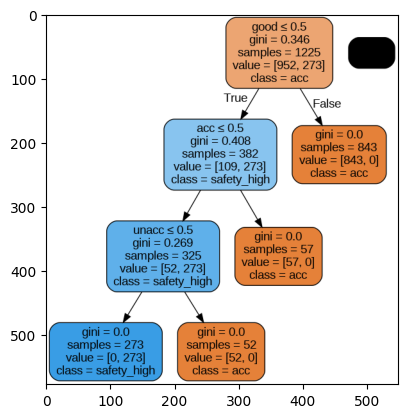

In [ ]:
img = pltimg.imread ('mydecisiontree.png')
imgplot = plt.imshow (img)
plt. show()


In [ ]:
#Código de ajuste del modelo de clasificación 2- Clasificador Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_entr= sc.fit_transform (X_entr)
X_prue= sc.fit_transform (X_prue)

In [ ]:
#Entrenamiento del modelo

from sklearn.naive_bayes import GaussianNB
Classifier= GaussianNB()

In [ ]:
Classifier.fit(X_entr,Y_entr)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
#Predicción conjunto de pruebas
predicted = model.predict(X_prue)
print("Actual Value:", Y_prue)
print("Predicted Value:", predicted)

Actual Value:       acc
883     0
804     0
1488    1
924     1
1377    0
...   ...
1120    0
945     1
316     0
1031    0
1112    0

[525 rows x 1 columns]
Predicted Value: [0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print (classification_report (Y_prue, predicted) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       117

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525



In [ ]:
#Matriz de confusion: muestra una precisión del 100%
print (confusion_matrix (Y_prue, predicted) )

[[408   0]
 [  0 117]]
